In [27]:
import pandas as pd
import requests
import pandas as pd
import re
import emoji
import unicodedata
import regex as re
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
from pyvi import ViTokenizer
from collections import Counter
from wordcloud import WordCloud
import joblib

In [28]:
dfFilm = pd.read_csv("film_cleaned.csv") #file trước khi gán thủ công

dfFilm_C = pd.read_csv("film_cleaned_ver2.csv") #file sau khi gán thủ công


EDA

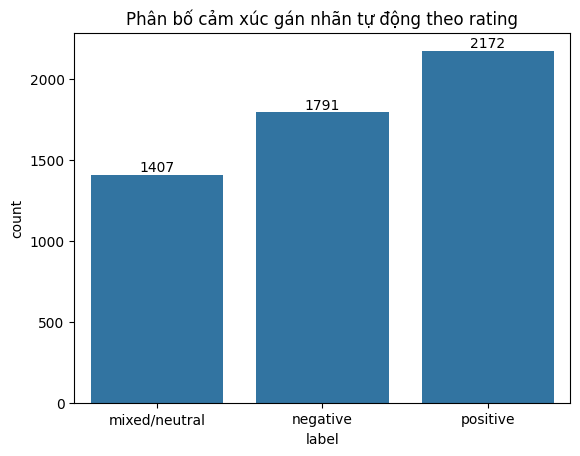

In [29]:
ax = sns.countplot(data=dfFilm, x="label")

# Ghi số lên mỗi cột
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        count,
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.title("Phân bố cảm xúc gán nhãn tự động theo rating")
plt.show()

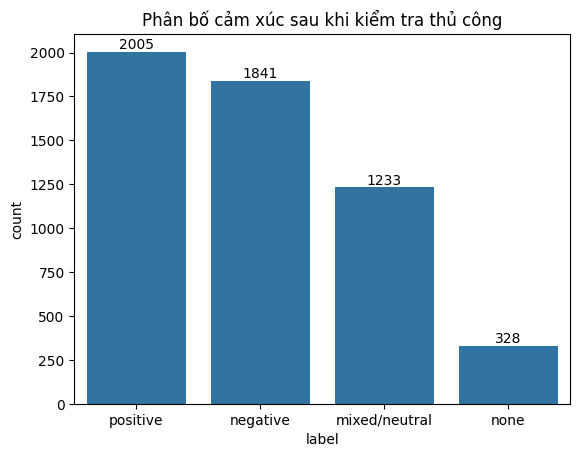

In [30]:
ax = sns.countplot(data=dfFilm_C, x="label")

# Ghi số lên mỗi cột
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        count,
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.title("Phân bố cảm xúc sau khi kiểm tra thủ công")
plt.show()

5.2 Tần suất từ phổ biến

5.2.1 WordCloud

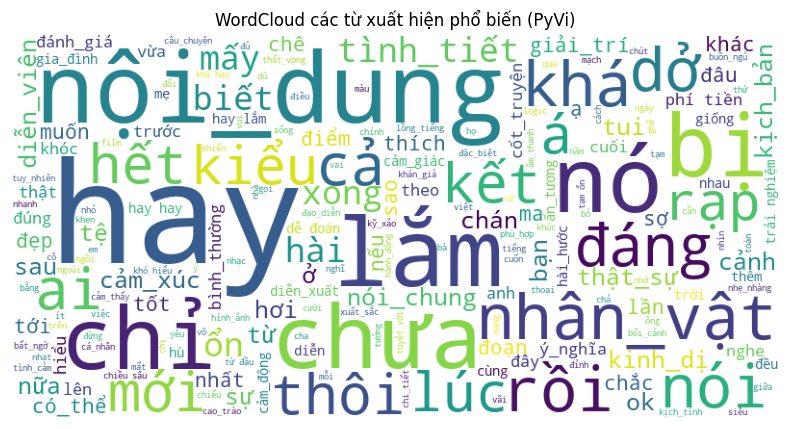

In [31]:
# tokenize từng comment
dfFilm_C["tokenized_text"] = dfFilm_C["cleaned_text"].apply(
    lambda x: ViTokenizer.tokenize(x) if isinstance(x, str) else ""
)

#------------------------------------------------
EXTRA_STOPWORDS = {
    "phim", "không", "nhưng", "được", "có", "mình", "như", "xem", "của", "tôi", 
    "con", "thấy", "coi", "người", "quá", "đi","nên", "bộ", "còn", "nhiều", "luôn",
    "cho", "lại", "cái", "vì", "gì", "phần", "những", "mọi", "về", "sẽ", "một",
    "phải", "hơn", "các", "rất", "vẫn", "nha", "làm", "đến", "cũng"
}

def remove_extra_stopwords_pyvi(text):
    if not isinstance(text, str):
        return ""
    tokens = text.split()   # token đã được PyVi nối bằng "_"
    tokens = [t for t in tokens if t not in EXTRA_STOPWORDS]
    return " ".join(tokens)

dfFilm_C["tokenized_text_nostop"] = dfFilm_C["tokenized_text"].apply(
    remove_extra_stopwords_pyvi
)
#------------------------------------------------


text_all = " ".join(dfFilm_C["tokenized_text_nostop"].dropna())

wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    font_path=None  # thêm font nếu lỗi hiển thị tiếng Việt
)

plt.figure(figsize=(10,5))
plt.imshow(wc.generate(text_all))
plt.axis("off")
plt.title("WordCloud các từ xuất hiện phổ biến (PyVi)")
plt.show()

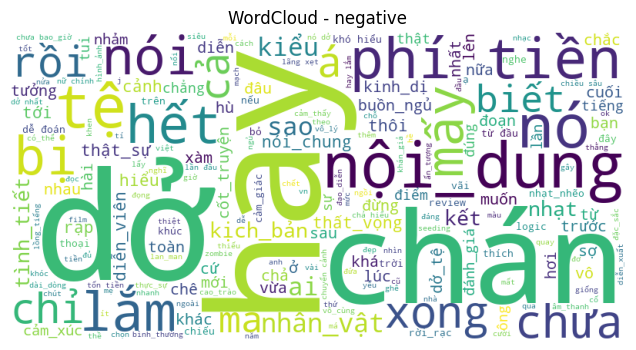

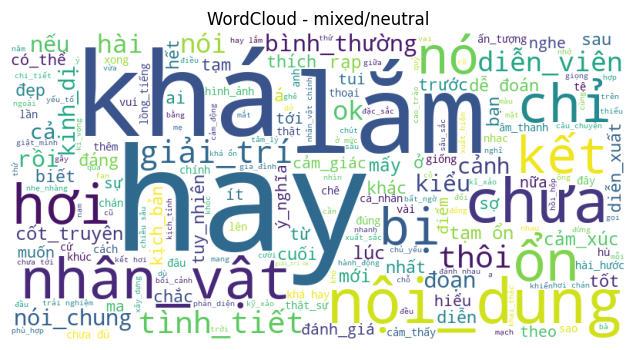

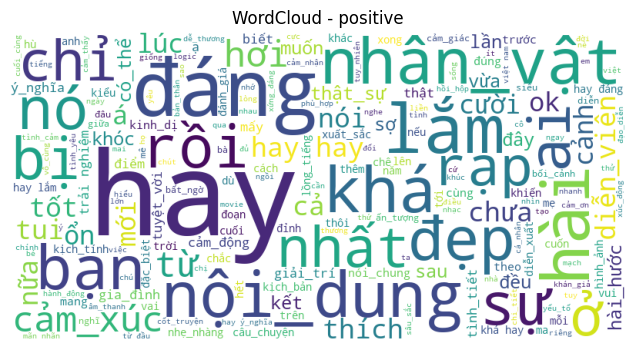

In [32]:
for label in ["negative", "mixed/neutral", "positive"]:
    text = " ".join(
        dfFilm_C[dfFilm_C["label"] == label]["tokenized_text_nostop"].dropna()
    )

    wc = WordCloud(
        width=800,
        height=400,
        background_color="white"
    )

    plt.figure(figsize=(8,4))
    plt.imshow(wc.generate(text))
    plt.axis("off")
    plt.title(f"WordCloud - {label}")
    plt.show()

5.2.2 Top token phổ biến (bar chart)

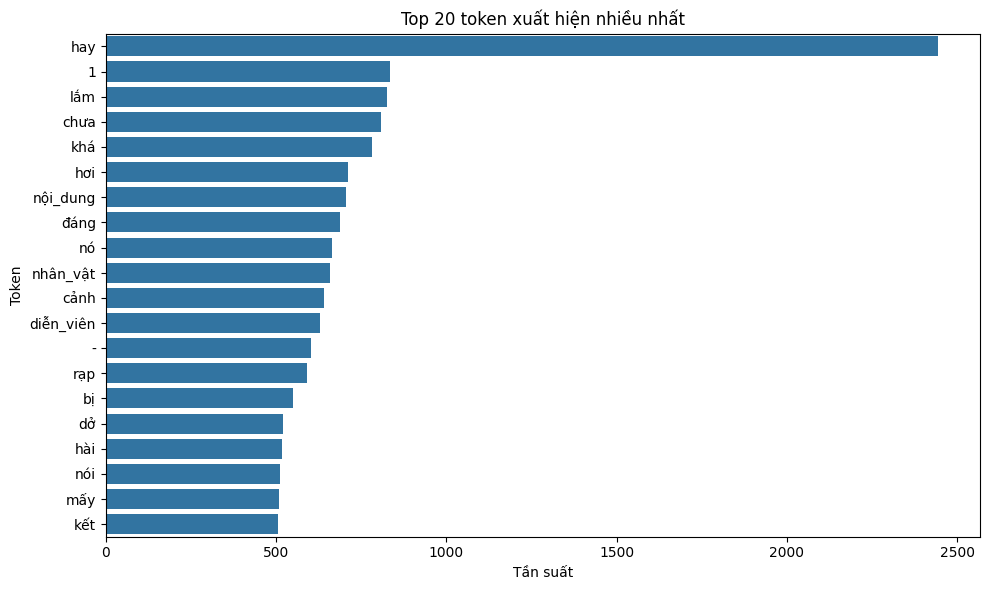

In [33]:
# gộp tất cả token
tokens = []
for text in dfFilm_C["tokenized_text_nostop"].dropna():
    tokens.extend(text.split())

# đếm tần suất
token_freq = Counter(tokens)

# chuyển sang DataFrame
df_token_freq = (
    pd.DataFrame(token_freq.items(), columns=["token", "frequency"])
    .sort_values(by="frequency", ascending=False)
)


TOP_N = 20
df_top = df_token_freq.head(TOP_N)

plt.figure(figsize=(10,6))
sns.barplot(data=df_top, x="frequency", y="token")
plt.title("Top 20 token xuất hiện nhiều nhất")
plt.xlabel("Tần suất")
plt.ylabel("Token")
plt.tight_layout()
plt.show()

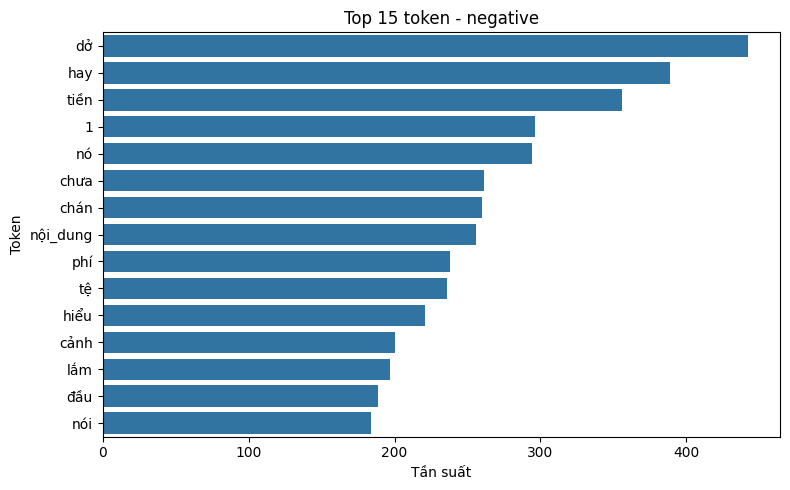

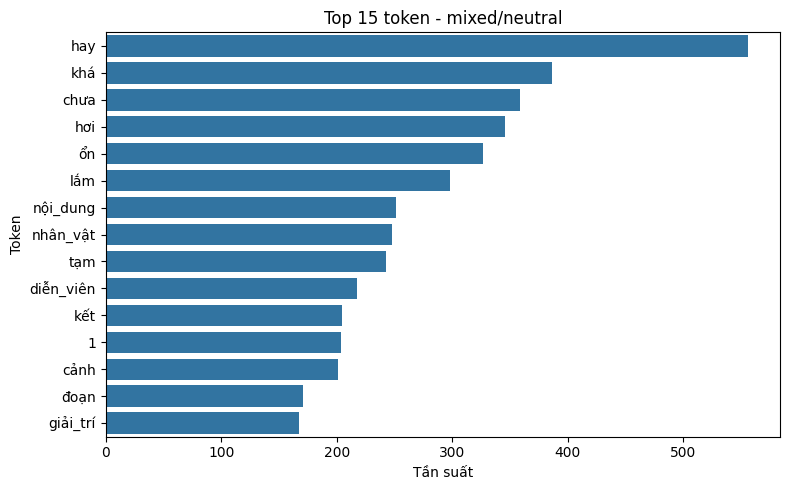

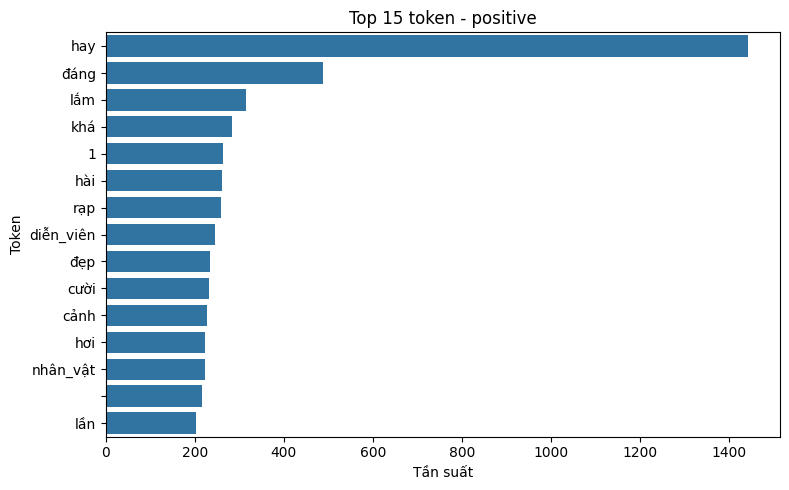

In [34]:
def plot_token_freq_by_label(df, label, top_n=15):
    tokens = []
    for text in df[df["label"] == label]["tokenized_text_nostop"].dropna():
        tokens.extend(text.split())

    freq = Counter(tokens)
    df_freq = (
        pd.DataFrame(freq.items(), columns=["token", "frequency"])
        .sort_values(by="frequency", ascending=False)
        .head(top_n)
    )

    plt.figure(figsize=(8,5))
    sns.barplot(data=df_freq, x="frequency", y="token")
    plt.title(f"Top {top_n} token - {label}")
    plt.xlabel("Tần suất")
    plt.ylabel("Token")
    plt.tight_layout()
    plt.show()

plot_token_freq_by_label(dfFilm_C, "negative")
plot_token_freq_by_label(dfFilm_C, "mixed/neutral")
plot_token_freq_by_label(dfFilm_C, "positive")

In [35]:
def top_words_by_label_pyvi(label, top_n=70):
    tokens = []
    for text in dfFilm_C[dfFilm_C["label"] == label]["tokenized_text"].dropna():
        tokens.extend(text.split())
    return Counter(tokens).most_common(top_n)

labels = ["positive", "negative", "mixed/neutral"]

for lb in labels:
    print(f"\nTop từ cho nhãn: {lb}")
    for w, c in top_words_by_label_pyvi(lb):
        print(f"{w}: {c}")


Top từ cho nhãn: positive
phim: 2904
xem: 1532
hay: 1442
mình: 994
không: 914
có: 911
rất: 747
người: 729
của: 668
cũng: 663
nhưng: 621
đi: 571
nên: 556
được: 500
đáng: 488
nhiều: 471
bộ: 464
quá: 451
nha: 448
thấy: 440
coi: 432
luôn: 408
về: 407
mọi: 404
một: 390
những: 388
cho: 384
như: 328
lại: 322
lắm: 315
các: 314
khá: 284
đến: 279
1: 263
hài: 261
rạp: 259
còn: 259
vì: 258
hơn: 256
vẫn: 252
diễn_viên: 246
phải: 245
đẹp: 234
phần: 233
cười: 232
cảnh: 227
hơi: 224
nhân_vật: 222
sẽ: 221
️: 216
làm: 205
cái: 204
lần: 203
từ: 193
nội_dung: 189
cả: 189
ở: 187
ai: 186
bạn: 184
rồi: 181
10: 177
tôi: 172
diễn: 171
nói: 169
nhất: 167
chưa: 165
ý_nghĩa: 165
bị: 165
thích: 160
cuối: 160

Top từ cho nhãn: negative
phim: 2332
không: 1667
xem: 1018
có: 763
gì: 506
mình: 459
được: 450
đi: 443
coi: 442
dở: 442
quá: 441
như: 437
cũng: 393
hay: 389
thấy: 378
tiền: 356
người: 344
nhưng: 340
cái: 323
luôn: 314
lại: 305
nhiều: 300
của: 298
nên: 297
1: 296
nó: 294
bộ: 287
còn: 285
cho: 271
về: 270
tôi:

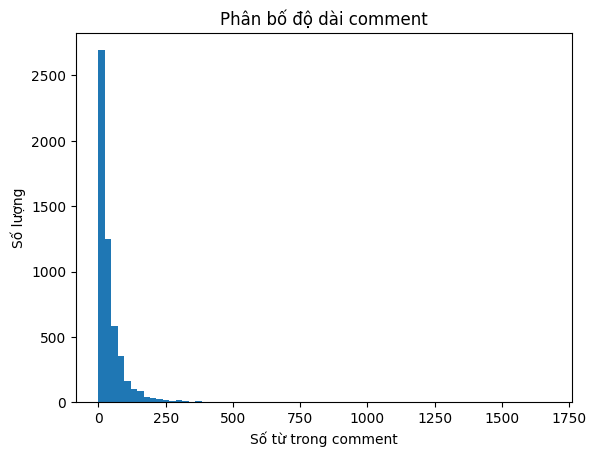

In [36]:
plt.figure()
plt.hist(dfFilm_C["length"], bins=70)
plt.xlabel("Số từ trong comment")
plt.ylabel("Số lượng")
plt.title("Phân bố độ dài comment")
plt.show()

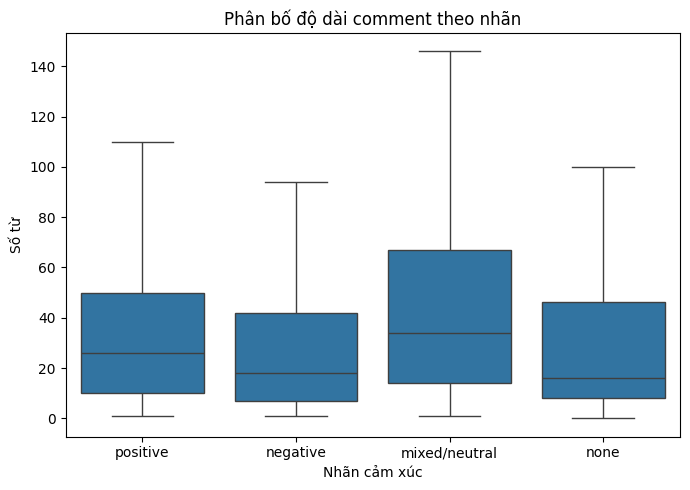

In [37]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=dfFilm_C,
    x="label",
    y="length",
    showfliers=False
)

plt.title("Phân bố độ dài comment theo nhãn")
plt.xlabel("Nhãn cảm xúc")
plt.ylabel("Số từ")

plt.tight_layout()
plt.show()

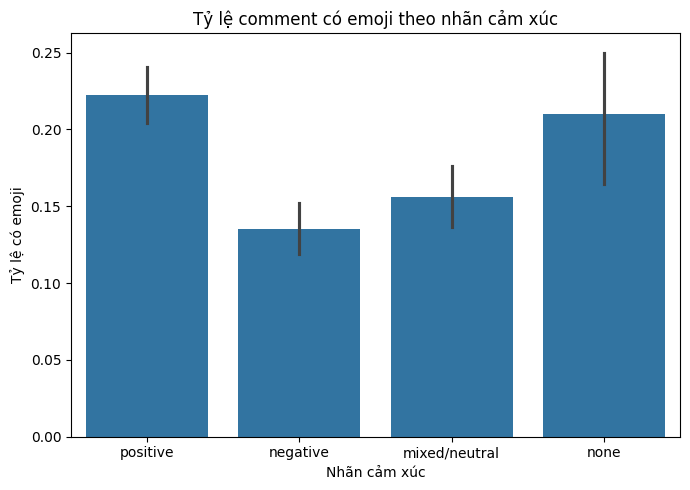

In [38]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=dfFilm_C,
    x="label",
    y="has_emoji",
    estimator="mean"
)

plt.title("Tỷ lệ comment có emoji theo nhãn cảm xúc")
plt.xlabel("Nhãn cảm xúc")
plt.ylabel("Tỷ lệ có emoji")

plt.tight_layout()
plt.show()

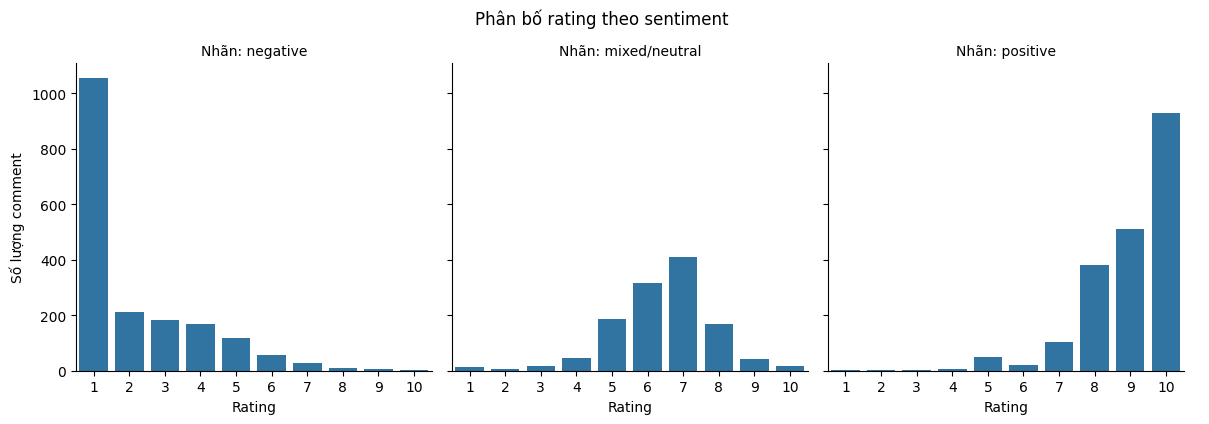

In [39]:
dfFilm_C["rating_num"] = (
    dfFilm_C["ratings"]
    .str.extract(r"(\d+)/10")
    .astype(int)
)

g = sns.catplot(
    data=dfFilm_C,
    x="rating_num",
    kind="count",
    col="label",
    col_order=["negative", "mixed/neutral", "positive"],
    order=range(1, 11),
    height=4,
    aspect=1
)

g.set_titles("Nhãn: {col_name}")
g.set_axis_labels("Rating", "Số lượng comment")

plt.suptitle("Phân bố rating theo sentiment", y=1.05)
plt.show()